In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* I have added one column in this dataset which contains battery Pack Capacity (KwH), because Electic Vehicle Analysis is incomplete without battery pack capacity

In [2]:
df = pd.read_csv('ElectricCarData_Clean.csv')

In [3]:
df

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


In [4]:
df.isnull().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

In [5]:
df.columns

Index(['Brand', 'Model', 'AccelSec', 'TopSpeed_KmH', 'Range_Km',
       'Efficiency_WhKm', 'FastCharge_KmH', 'RapidCharge', 'PowerTrain',
       'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro'],
      dtype='object')

* Adding one more column for futher analysis
* Dividing dataframe based on price for easier analysis

In [6]:
df['FullName'] = df['Brand'] + '-' + df['Model']
df_1 = df.loc[df['PriceEuro'] <= 50000]
df_2 = df.loc[df['PriceEuro'] > 50000]
t1 = 'Less than 50,000 Euros' 
t2 = 'More than 50,000 Euros'

# Function for Data Visualization 

## Count Plots

### count plot for powertrain

In [7]:
def power_train(dataframe): 
    sns.countplot(x= dataframe['PowerTrain'])
    plt.title('Count Plot of Powertrain', fontsize = 20)
    plt.xlabel('Power Train', fontsize = 15)
    plt.ylabel('Count', fontsize = 15)



### Count plot for body style

In [8]:
def bodystyle(dataframe):
    plt.figure(figsize=(10, 5))
    sns.countplot(x= 'BodyStyle', data= dataframe, hue='PowerTrain')
    plt.title('Count plot of Body Style', fontsize= 20)
    plt.xlabel('Body Style', fontsize= 15)
    plt.ylabel('Count', fontsize= 15)
    plt.show()

## Bar Graphs 

### Function to plot range of vehicles

In [9]:
def range(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'Range_Km' , data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Range(Km) of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Range (Km)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

### Range vs Battery Pack

In [10]:
def range_batterypack(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.105))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Battery_Pack Kwh'], label= 'Battery Pack', color = 'black')
  plt.title('''RANGE (Km) vs BATTERY PACK CAPACITY (KwH) of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Battery Pack Capacity (Kwh)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

### Acceleration (0 - 100Km/Hr) 

In [11]:
def acc(dataframe, text):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'AccelSec', data = dataframe, hue = dataframe['PowerTrain'])
  plt.title('''Acceleration 0-100 Km  of EV's costing {}'''.format(text), fontsize= 20)
  plt.ylabel('Acceleration (seconds)')
  plt.xlabel('Model')
  plt.xticks(rotation = 90)
  plt.show()

### Range vs Price

In [12]:
def range_price(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'steelblue')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['PriceEuro'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs PRICE (Euros)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'steelblue', size = 20)
  ax2.set_ylabel('Price (Euros)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

### Range vs Efficiency

In [13]:
def range_efficiency(dataframe, text):
  fig = plt.figure(figsize=(20,5))
  ax1 = plt.subplot()
  ax1.bar(dataframe['FullName'], dataframe['Range_Km'],label= 'Range (Km)', color= 'darkseagreen')
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1.1))
  ax2 = ax1.twinx()
  ax2.scatter(dataframe['FullName'], dataframe['Efficiency_WhKm'], label= 'Price', color = 'black')
  plt.title('''RANGE (Km) vs Efficiency (Wh/km)of EV's costing {}'''.format(text), fontsize= 20)
  ax1.set_xlabel('Models', size = 20)
  ax1.set_ylabel('Range (Km)', color = 'darkseagreen', size = 20)
  ax2.set_ylabel('Efficiency (Wh/Km)', color= 'black', size= 20)
  plt.legend(loc= 'upper left', bbox_to_anchor = (0, 1))
  ax1.set_xticklabels(df_1['FullName'], rotation = 'vertical')
  plt.show()

### Fast charging data

In [14]:
def fastcharge(dataframe, price):
  plt.figure(figsize=(20,5))
  sns.set_theme(style="whitegrid")
  sns.barplot('FullName', 'FastCharge_KmH' , data = dataframe, color = 'lightslategrey')
  plt.title('''Fast Charging of EV's costing {} '''.format(price), fontsize = 20)
  plt.ylabel('Charging Capacity (kmH)', fontsize= 15)
  plt.xlabel('Model', fontsize= 15)
  plt.xticks(rotation = 90)
  plt.show()

# Data Visualization

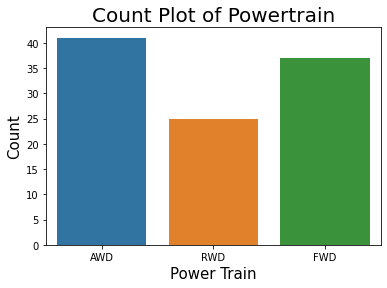

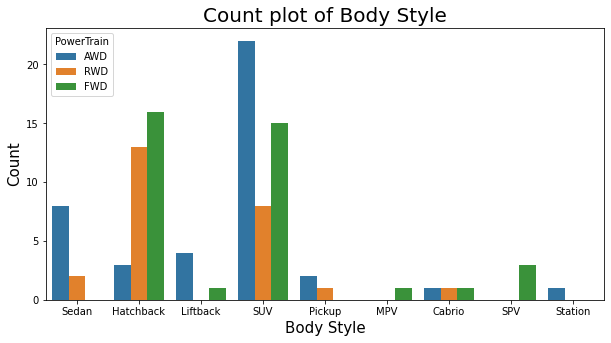

In [15]:
# Count Plots
power_train(df)
bodystyle(df)

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


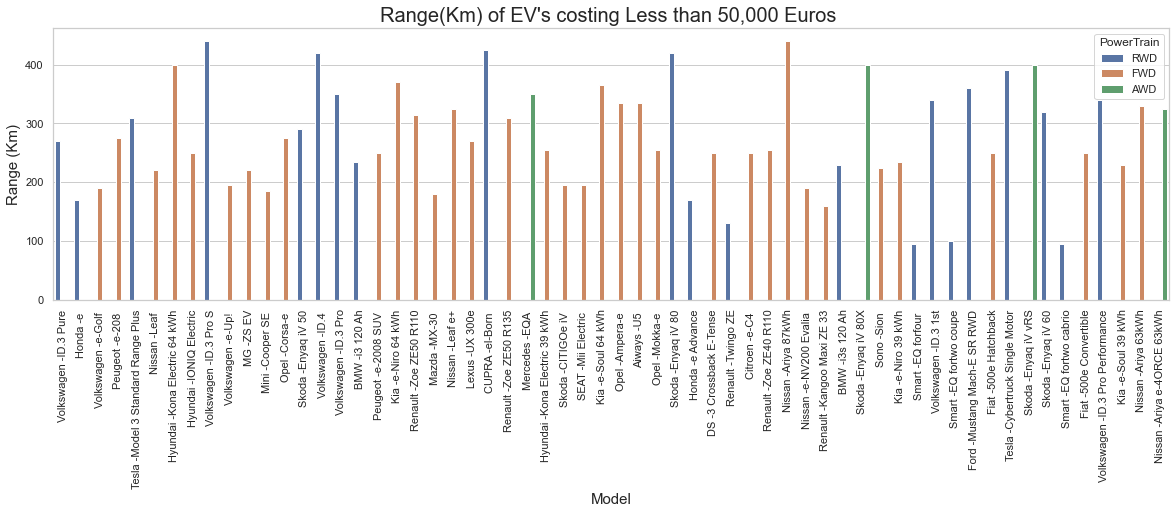

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


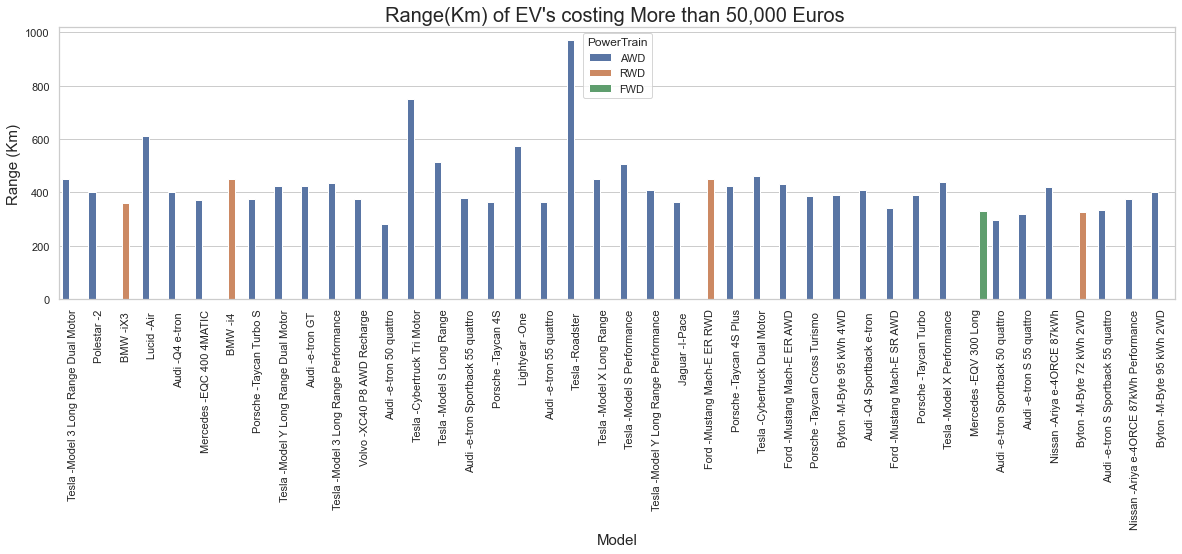

In [16]:
# Bar Graphs
range(df_1, t1)
range(df_2, t2)


KeyError: 'Battery_Pack Kwh'

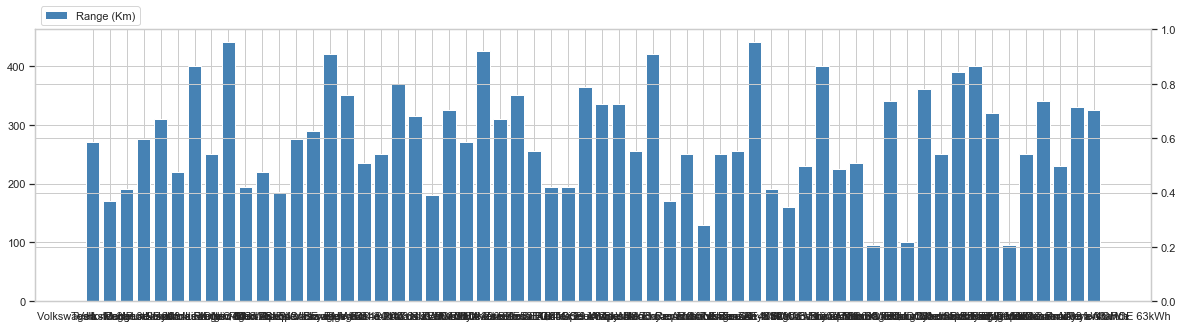

In [17]:
range_batterypack(df_1, t1)
range_batterypack(df_2, t2)

In [ ]:
# Acceleration
acc(df_1, t1)
acc(df_2, t2)

In [ ]:
# price vs acceleration
range_price(df_1, t1)
range_price(df_2, t2)

In [ ]:
# range vs efficiency
range_efficiency(df_1, t1)
range_efficiency(df_2, t2)

In [ ]:
# Fast charge Data
fastcharge(df_1, t1)
fastcharge(df_2, t2)

# Answering some basic questions

## Which vehicle has max range (km) under 50,000 Euros?

In [ ]:
pd.set_option('display.max_columns', None)
top_range_1 = df_1.sort_values(by= 'Range_Km', ascending= False)
print(top_range_1[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

## Which vehicle has max range(Km) costing more than 50,000 Euros

In [ ]:
pd.set_option('display.max_columns', None)
top_range_2 = df_2.sort_values(by= 'Range_Km', ascending= False)
print(top_range_2[['FullName', 'Range_Km', 'Battery_Pack Kwh' ,'PriceEuro', 'RapidCharge']])

## Vehicles with best acceleration under 50,000 Euros

In [ ]:
pd.set_option('display.max_columns', None)
acceleration_1 = df_1.sort_values(by= 'AccelSec')
print(acceleration_1[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

## Vehicles with best acceleration costing over 50,000 Euros

In [ ]:
pd.set_option('display.max_columns', None)
acceleration_2 = df_2.sort_values(by= 'AccelSec')
print(acceleration_2[['FullName','AccelSec', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

## Number of vehicles produced by each brand

In [ ]:
companies = df.groupby('Brand').count()
print(companies['Model'].sort_values(ascending = False))

Vehicles with maximum efficiency

In [ ]:
pd.set_option('display.max_columns', None)
eff = df.sort_values(by= 'Efficiency_WhKm')
print(eff[['FullName','Efficiency_WhKm', 'Range_Km', 'PowerTrain','Battery_Pack Kwh' ,'PriceEuro']])

# Conclusions
* Range of vehicle is proportional to Battery Pack Capacity
* Price of vehicle is proportional battery pack capacity
* EV's which cost less have higher acceleration(0-100 Km/Hr) time in order to maximize range
* High performance EV's have lower efficiency
* Most of the vehicles costing less than 50,000 Euros are Front Wheel Drive
* Most of the vehicles costing over 50,000 Euros are either All wheel drive or Rear wheel drive and have better acceleration

* All suggestions are welcomed